In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 12,10

def Q(n, mu, la):
    p1 = la*(1-mu)
    p2 = (1-la)*mu
    p3 = (1-mu)*(1-la) + la*mu
    a = random.random()

    if(a>=0 and a<=p1):
        return [n+1,1]
    elif(a>p1 and a<=p1+p2):
        return [n-1,-1]
    else:
        return [n,0]


n = [0,0]
mus = [0.9,0.7,0.7]
las = [0.7,0.9,0.7]

main_dict = {}

for i in range(len(mus)):
    mu=mus[i]
    la=las[i]
    value_matrix = []
    for j in range(10000):
        values = []
        #changes = []
        for i in range(1000):
            n = Q(n[0],mu,la)
            #changes += [n[1]]
            values += [n[0]]

        value_matrix += [values]
        # print(f"Time average for lambda={la} and mu={mu} = {np.mean(np.array(values))}")
        # plt.plot(range(1,1001),values)
        # plt.ylabel(f"Q(n) for lambda = {la} and mu = {mu}")
        # plt.xlabel("n")
        # plt.show()
    main_dict[(mu,la)] = value_matrix

In [2]:
import numpy as np

for key in main_dict.keys():
    val = main_dict[key]
    val = np.array(val)
    print(f"shape = ",val.shape)
    mean_func = np.average(val,axis=0)
    print(f"mu={key[0]} and lambda={key[1]}")
    print(f"Mean = {np.average(mean_func)}")
    print(f"Standard Deviation = {np.std(mean_func)}")
    print(f"Mean/Stddev ={np.average(mean_func)/np.std(mean_func)}",'\n')

shape =  (10000, 1000)
mu=0.9 and lambda=0.7
Mean = -1000867.4637007001
Standard Deviation = 57.746478822206186
Mean/Stddev =-17332.095118426863 

shape =  (10000, 1000)
mu=0.7 and lambda=0.9
Mean = -1000265.3003606999
Standard Deviation = 57.80105835657212
Mean/Stddev =-17305.311162126276 

shape =  (10000, 1000)
mu=0.7 and lambda=0.7
Mean = 1402.7683369999997
Standard Deviation = 0.03378330698732883
Mean/Stddev =41522.52878991802 



In [3]:
import numpy as np

for key in main_dict.keys():
    val = main_dict[key]
    val = np.array(val)
    R = np.dot(val.T,val)/val.shape[0]
    print(R)
    break

[[ -76336.5523  128760.9532 -100051.7011 ...   58059.0588 -173672.58
    30006.1715]
 [ 128760.9532  -95637.9251  105046.1894 ... -166299.0189   31466.1214
  -194351.8117]
 [-100051.7011  105046.1894 -123766.0923 ...   34425.1406 -197306.4101
     6372.4286]
 ...
 [  58059.0588 -166299.0189   34425.1406 ... -196962.7742     841.3625
   204560.1522]
 [-173672.58     31466.1214 -197306.4101 ...     841.3625  198645.8441
   -27132.0644]
 [  30006.1715 -194351.8117    6372.4286 ...  204560.1522  -27132.0644
   176587.0962]]


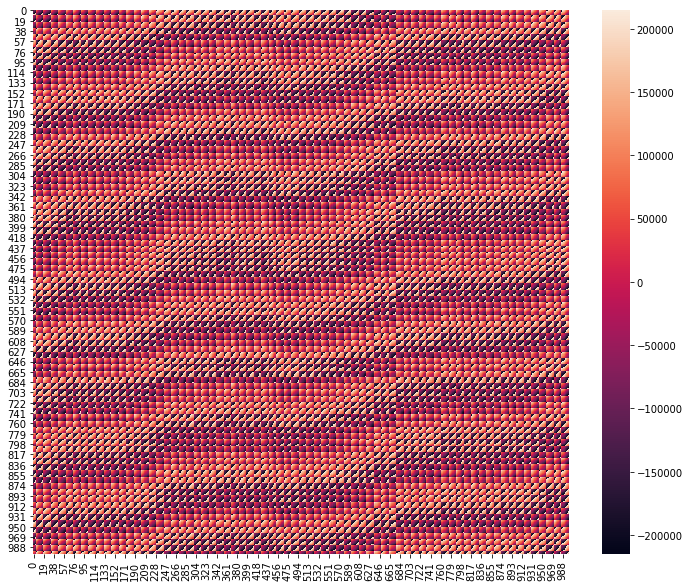

In [4]:
import seaborn as sns
sns.heatmap(R)
plt.show()